In [1]:
import yfinance as yf
import pandas as pd

def get_stock_data(stock_code,period):
    stock = yf.Ticker(stock_code)
    data = stock.history(period=period)  # 爬取過去1年的資料
    return data

# 示例：爬取台積電（TSMC）的股價資料
stock_code = "2330.TW"  # 台灣股市的股票代碼
data = get_stock_data(stock_code=stock_code,period="90d")
print(data.head())


                                 Open         High         Low        Close  \
Date                                                                          
2024-09-19 00:00:00+08:00  936.401933   956.325378  932.417244   956.325378   
2024-09-20 00:00:00+08:00  977.244952   978.241124  967.283229   969.275574   
2024-09-23 00:00:00+08:00  967.283281   973.260315  967.283281   973.260315   
2024-09-24 00:00:00+08:00  972.264090   983.221985  967.283229   983.221985   
2024-09-25 00:00:00+08:00  996.172276  1001.153137  994.179931  1001.153137   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-09-19 00:00:00+08:00  32739630        0.0           0.0  
2024-09-20 00:00:00+08:00  60133709        0.0           0.0  
2024-09-23 00:00:00+08:00  14497067        0.0           0.0  
2024-09-24 00:00:00+08:00  26785975        0.0           0.0  
2024-09-25 00:00:00+08:00  39405222        0.0           0.0  


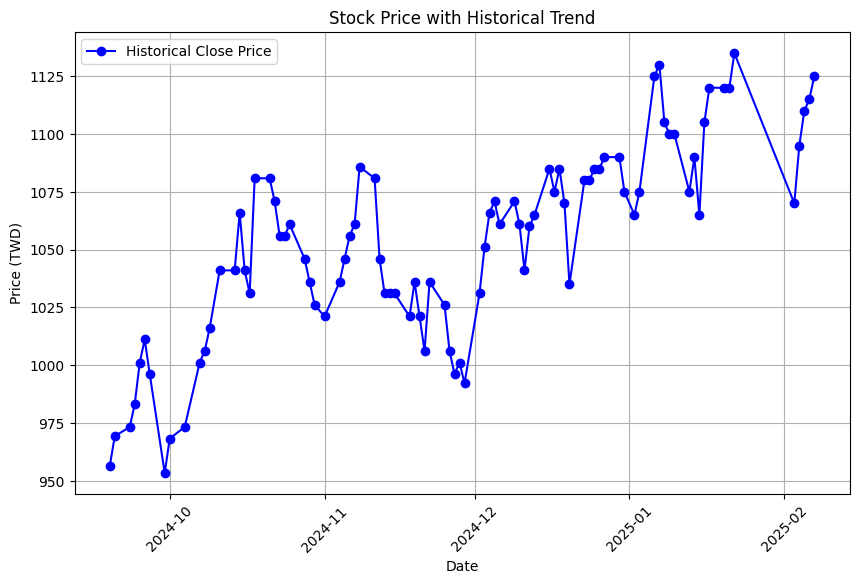

In [2]:
import matplotlib.pyplot as plt

# 繪製股價資料與回歸分析線
def plot_stock_data(data):
    # 繪製股價資料與回歸直線
    plt.figure(figsize=(10, 6))
    
    # 使用淺藍色 (#ADD8E6) 繪製過去股價的直線
    plt.plot(data.index, data['Close'], label='Historical Close Price', color='blue', linestyle='-', marker='o')
    
    # 設定標題與標籤
    plt.title("Stock Price with Historical Trend")
    plt.xlabel("Date")
    plt.ylabel("Price (TWD)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # 顯示圖表
    plt.show()


# 繪製股價折線圖並加上回歸直線
plot_stock_data(data)


In [3]:
from sklearn.linear_model import LinearRegression

# 計算過去股價的回歸分析，並返回回歸直線數據
def perform_regression(data):
    # 將日期轉換為數字型態（用於線性回歸）
    data['Date'] = pd.to_datetime(data.index)
    data['Date_ordinal'] = data['Date'].map(lambda x: x.toordinal())  # 日期轉為數字型態
    
    # 準備回歸模型的自變數（日期數字）與因變數（股價）
    X = data[['Date_ordinal']]  # 日期數字型態
    y = data['Close']  # 股價
    
    # 訓練線性回歸模型
    model = LinearRegression()
    model.fit(X, y)
    
    # 預測回歸直線上的股價
    data['Regression_Line'] = model.predict(X)
    
    # 返回回歸分析後的數據（包含回歸直線）
    return data

# 進行回歸分析
data_with_regression = perform_regression(data)
# print(data_with_regression.head())

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def predict_stock_price(data,periods):
    # 將日期轉換為數字型態
    data['Date'] = pd.to_datetime(data.index)
    data['Date'] = data['Date'].map(lambda x: x.toordinal())
    
    # 取用「Date」與「Close」兩個欄位
    X = data[['Date']]  # 日期數字型態
    y = data['Close']  # 股價

    # 建立線性迴歸模型
    model = LinearRegression()
    model.fit(X, y)

    # 預測未來N天
    future_dates = pd.date_range(start=data.index[-1], periods=periods, freq='B')[1:]  # 預測接下來5個交易日
    future_dates_ordinal = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)

    predicted_prices = model.predict(future_dates_ordinal)

    # 將預測結果與日期組合成DataFrame
    predicted_data = pd.DataFrame({
        'Date': future_dates,
        'Predicted Close': predicted_prices
    })

    return predicted_data


# 預測未來N天的股價
predicted_data = predict_stock_price(data=data,periods=30)
# print(predicted_data)

/Users/Hsiang/Desktop/sideproject/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import matplotlib.dates as mdates

def plot_predicted_data(predicted_data, periods=10,interval=1):
    # 只繪製預測股價
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_data['Date'], predicted_data['Predicted Close'], label='Predicted Close Price', color='red', linestyle='--')

    # 設定圖表標題和標籤
    plt.title(f"Stock Price Prediction for the Next {periods} Days")
    plt.xlabel("Date")
    plt.ylabel("Price (TWD)")

    # 設定日期顯示格式
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 日期格式為年-月-日
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=interval))  # 每隔一天顯示一個日期

    # 顯示網格
    plt.grid(True)
    
    # 顯示圖例
    plt.legend()

    # 顯示圖表
    plt.show()

# 假設 predcited_data 已經定義並包含預測結果
# 使用示例：繪製預測股價的圖表
# plot_predicted_data(predicted_data=predicted_data, periods=30,interval=5)


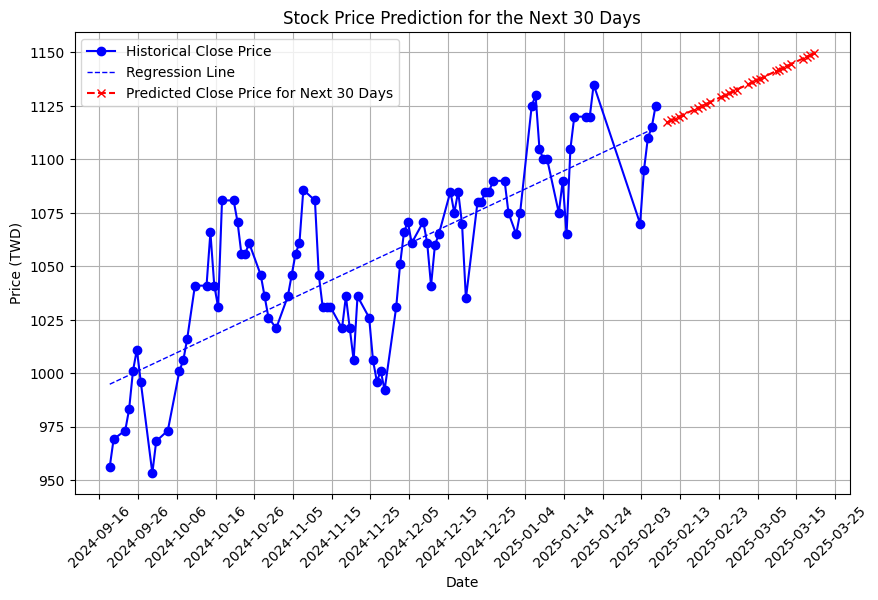

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_stock_data(data, predicted_data, periods=5, interval=3):
    # 繪製股價資料與回歸直線
    plt.figure(figsize=(10, 6))
    
    # 繪製過去股價
    plt.plot(data.index, data['Close'], label='Historical Close Price', color='blue', linestyle='-', marker='o')
    
    # 繪製過去股價回歸分析的虛線
    plt.plot(data.index, data['Regression_Line'], label='Regression Line', color='blue', linestyle='--', linewidth=1)

    # 繪製預測的股價
    plt.plot(predicted_data['Date'], predicted_data['Predicted Close'], \
        label=f'Predicted Close Price for Next {periods} Days', color='red', linestyle='--', marker='x')

    # 設定標題與標籤
    plt.title(f"Stock Price Prediction for the Next {periods} Days")
    plt.xlabel("Date")
    plt.ylabel("Price (TWD)")

    # 設定日期顯示格式
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 日期格式為年-月-日
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=interval))  # 每隔指定天數顯示日期

    # 顯示網格
    plt.grid(True)

    # 顯示圖例
    plt.legend()

    # 顯示圖表
    plt.show()


# 繪製股價圖表
plot_stock_data(data, predicted_data, periods=30, interval=10)
